In [1]:
#add the dev version of aare
import sys; sys.path.append('/home/l_msdetect/erik/aare/build')
from helpers import nb_aare_version
nb_aare_version()

from aare import CtbRawFile, RawMasterFile, File, RawFile, RawSubFile, DetectorType
from aare.transform import moench05, moench05_old, moench05_1g

#Our normal python imports
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import boost_histogram as bh

Example run on: **2025-04-23 10:48** with aare: **dev**

## Doping analysis

1. Read pedestal ~1000 frames calculate mean and std
1. Read signal frame 

In [2]:
path = Path('/mnt/sls_det_storage/moench_data/xiangyu/241121_BP_3dImaging_Moench2_g4_50us')
files = [f for f in path.glob('*.json')]
files.sort(key=lambda x: float(x.name.split('_')[0].strip('HV')))

HV_list = []
pulse_list = []

for f in files:
    print(f.name, f'frames: {RawFile(f).total_frames}')
    hv, pulse,_ = f.name.split('_',2)
    hv = float(hv.strip('HV'))
    HV_list.append(hv)
    
    pulse = float(pulse.strip('pulseV'))
    pulse_list.append(pulse)
   
#Assume we have two of each
HV = np.array(HV_list[::2])
pulse = np.array(pulse_list[::2])

print(HV.size, pulse.size)

HV1.7V_pulse0.201V_dark_master_0.json frames: 1999
HV1.7V_pulse0.201V_pulsed_master_0.json frames: 2000
HV1.71V_pulse0.203V_pulsed_master_0.json frames: 1809
HV1.71V_pulse0.203V_dark_master_0.json frames: 1674
HV1.72V_pulse0.205V_pulsed_master_0.json frames: 1858
HV1.72V_pulse0.205V_dark_master_0.json frames: 1825
HV1.73V_pulse0.207V_pulsed_master_0.json frames: 1935
HV1.73V_pulse0.207V_dark_master_0.json frames: 1944
HV1.741V_pulse0.209V_pulsed_master_0.json frames: 1954
HV1.741V_pulse0.209V_dark_master_0.json frames: 2000
HV1.752V_pulse0.211V_dark_master_0.json frames: 1816
HV1.752V_pulse0.211V_pulsed_master_0.json frames: 1755
HV1.763V_pulse0.213V_pulsed_master_0.json frames: 1660
HV1.763V_pulse0.213V_dark_master_0.json frames: 1929
HV1.774V_pulse0.215V_pulsed_master_0.json frames: 1935
HV1.774V_pulse0.215V_dark_master_0.json frames: 2000
HV1.785V_pulse0.217V_pulsed_master_0.json frames: 1789
HV1.785V_pulse0.217V_dark_master_0.json frames: 1928
HV1.796V_pulse0.219V_dark_master_0.jso

HV2.812V_pulse0.361V_pulsed_master_0.json frames: 1693
HV2.831V_pulse0.363V_dark_master_0.json frames: 1870
HV2.831V_pulse0.363V_pulsed_master_0.json frames: 2000
HV2.85V_pulse0.365V_pulsed_master_0.json frames: 1690
HV2.85V_pulse0.365V_dark_master_0.json frames: 2000
HV2.869V_pulse0.367V_pulsed_master_0.json frames: 2000
HV2.869V_pulse0.367V_dark_master_0.json frames: 1805
HV2.888V_pulse0.369V_pulsed_master_0.json frames: 2000
HV2.888V_pulse0.369V_dark_master_0.json frames: 2000
HV2.907V_pulse0.371V_dark_master_0.json frames: 2000
HV2.907V_pulse0.371V_pulsed_master_0.json frames: 2000
HV2.926V_pulse0.373V_dark_master_0.json frames: 2000
HV2.926V_pulse0.373V_pulsed_master_0.json frames: 2000
HV2.946V_pulse0.376V_dark_master_0.json frames: 2000
HV2.946V_pulse0.376V_pulsed_master_0.json frames: 2000
HV2.966V_pulse0.378V_pulsed_master_0.json frames: 2000
HV2.966V_pulse0.378V_dark_master_0.json frames: 2000
HV2.986V_pulse0.38V_dark_master_0.json frames: 2000
HV2.986V_pulse0.38V_pulsed_mast

HV4.649V_pulse0.528V_dark_master_0.json frames: 2000
HV4.677V_pulse0.53V_pulsed_master_0.json frames: 2000
HV4.677V_pulse0.53V_dark_master_0.json frames: 2000
HV4.705V_pulse0.532V_pulsed_master_0.json frames: 2000
HV4.705V_pulse0.532V_dark_master_0.json frames: 2000
HV4.733V_pulse0.534V_dark_master_0.json frames: 2000
HV4.733V_pulse0.534V_pulsed_master_0.json frames: 2000
HV4.761V_pulse0.537V_pulsed_master_0.json frames: 2000
HV4.761V_pulse0.537V_dark_master_0.json frames: 2000
HV4.789V_pulse0.539V_pulsed_master_0.json frames: 2000
HV4.789V_pulse0.539V_dark_master_0.json frames: 2000
HV4.817V_pulse0.541V_pulsed_master_0.json frames: 2000
HV4.817V_pulse0.541V_dark_master_0.json frames: 2000
HV4.845V_pulse0.543V_dark_master_0.json frames: 2000
HV4.845V_pulse0.543V_pulsed_master_0.json frames: 2000
HV4.874V_pulse0.545V_dark_master_0.json frames: 2000
HV4.874V_pulse0.545V_pulsed_master_0.json frames: 2000
HV4.903V_pulse0.547V_pulsed_master_0.json frames: 2000
HV4.903V_pulse0.547V_dark_mast

HV7.195V_pulse0.696V_pulsed_master_0.json frames: 2000
HV7.232V_pulse0.698V_pulsed_master_0.json frames: 2000
HV7.232V_pulse0.698V_dark_master_0.json frames: 2000
HV7.269V_pulse0.701V_pulsed_master_0.json frames: 2000
HV7.269V_pulse0.701V_dark_master_0.json frames: 2000
HV7.306V_pulse0.703V_dark_master_0.json frames: 2000
HV7.306V_pulse0.703V_pulsed_master_0.json frames: 2000
HV7.343V_pulse0.705V_pulsed_master_0.json frames: 2000
HV7.343V_pulse0.705V_dark_master_0.json frames: 2000
HV7.38V_pulse0.707V_dark_master_0.json frames: 2000
HV7.38V_pulse0.707V_pulsed_master_0.json frames: 2000
HV7.417V_pulse0.709V_dark_master_0.json frames: 2000
HV7.417V_pulse0.709V_pulsed_master_0.json frames: 2000
HV7.454V_pulse0.711V_pulsed_master_0.json frames: 2000
HV7.454V_pulse0.711V_dark_master_0.json frames: 2000
HV7.492V_pulse0.713V_pulsed_master_0.json frames: 2000
HV7.492V_pulse0.713V_dark_master_0.json frames: 2000
HV7.53V_pulse0.716V_dark_master_0.json frames: 2000
HV7.53V_pulse0.716V_pulsed_mast

HV10.362V_pulse0.861V_dark_master_0.json frames: 2000
HV10.362V_pulse0.861V_pulsed_master_0.json frames: 2000
HV10.408V_pulse0.863V_pulsed_master_0.json frames: 2000
HV10.408V_pulse0.863V_dark_master_0.json frames: 2000
HV10.454V_pulse0.865V_pulsed_master_0.json frames: 2000
HV10.454V_pulse0.865V_dark_master_0.json frames: 2000
HV10.5V_pulse0.867V_pulsed_master_0.json frames: 2000
HV10.5V_pulse0.867V_dark_master_0.json frames: 2000
HV10.546V_pulse0.87V_dark_master_0.json frames: 2000
HV10.546V_pulse0.87V_pulsed_master_0.json frames: 2000
HV10.592V_pulse0.872V_dark_master_0.json frames: 2000
HV10.592V_pulse0.872V_pulsed_master_0.json frames: 2000
HV10.638V_pulse0.874V_pulsed_master_0.json frames: 2000
HV10.638V_pulse0.874V_dark_master_0.json frames: 2000
HV10.684V_pulse0.876V_dark_master_0.json frames: 2000
HV10.684V_pulse0.876V_pulsed_master_0.json frames: 2000
HV10.73V_pulse0.878V_dark_master_0.json frames: 2000
HV10.73V_pulse0.878V_pulsed_master_0.json frames: 2000
HV10.777V_pulse0.8

HV14.155V_pulse1.024V_pulsed_master_0.json frames: 2000
HV14.155V_pulse1.024V_dark_master_0.json frames: 2000
HV14.209V_pulse1.026V_pulsed_master_0.json frames: 2000
HV14.209V_pulse1.026V_dark_master_0.json frames: 2000
HV14.263V_pulse1.028V_dark_master_0.json frames: 2000
HV14.263V_pulse1.028V_pulsed_master_0.json frames: 2000
HV14.318V_pulse1.03V_pulsed_master_0.json frames: 2000
HV14.318V_pulse1.03V_dark_master_0.json frames: 2000
HV14.373V_pulse1.032V_dark_master_0.json frames: 2000
HV14.373V_pulse1.032V_pulsed_master_0.json frames: 2000
HV14.428V_pulse1.035V_dark_master_0.json frames: 2000
HV14.428V_pulse1.035V_pulsed_master_0.json frames: 2000
HV14.483V_pulse1.037V_dark_master_0.json frames: 2000
HV14.483V_pulse1.037V_pulsed_master_0.json frames: 2000
HV14.538V_pulse1.039V_dark_master_0.json frames: 2000
HV14.538V_pulse1.039V_pulsed_master_0.json frames: 2000
HV14.593V_pulse1.041V_dark_master_0.json frames: 2000
HV14.593V_pulse1.041V_pulsed_master_0.json frames: 2000
HV14.648V_pu

HV18.547V_pulse1.185V_pulsed_master_0.json frames: 2000
HV18.547V_pulse1.185V_dark_master_0.json frames: 2000
HV18.61V_pulse1.187V_dark_master_0.json frames: 2000
HV18.61V_pulse1.187V_pulsed_master_0.json frames: 2000
HV18.673V_pulse1.189V_pulsed_master_0.json frames: 2000
HV18.673V_pulse1.189V_dark_master_0.json frames: 2000
HV18.736V_pulse1.191V_dark_master_0.json frames: 2000
HV18.736V_pulse1.191V_pulsed_master_0.json frames: 2000
HV18.799V_pulse1.193V_pulsed_master_0.json frames: 2000
HV18.799V_pulse1.193V_dark_master_0.json frames: 2000
HV18.862V_pulse1.196V_pulsed_master_0.json frames: 2000
HV18.862V_pulse1.196V_dark_master_0.json frames: 2000
HV18.926V_pulse1.198V_pulsed_master_0.json frames: 2000
HV18.926V_pulse1.198V_dark_master_0.json frames: 2000
HV18.99V_pulse1.2V_dark_master_0.json frames: 2000
HV18.99V_pulse1.2V_pulsed_master_0.json frames: 2000
HV19.054V_pulse1.202V_dark_master_0.json frames: 2000
HV19.054V_pulse1.202V_pulsed_master_0.json frames: 2000
HV19.118V_pulse1.2

HV23.585V_pulse1.346V_dark_master_0.json frames: 2000
HV23.585V_pulse1.346V_pulsed_master_0.json frames: 2000
HV23.657V_pulse1.348V_pulsed_master_0.json frames: 2000
HV23.657V_pulse1.348V_dark_master_0.json frames: 2000
HV23.729V_pulse1.35V_pulsed_master_0.json frames: 2000
HV23.729V_pulse1.35V_dark_master_0.json frames: 2000
HV23.801V_pulse1.353V_pulsed_master_0.json frames: 2000
HV23.801V_pulse1.353V_dark_master_0.json frames: 2000
HV23.873V_pulse1.355V_dark_master_0.json frames: 2000
HV23.873V_pulse1.355V_pulsed_master_0.json frames: 2000
HV23.945V_pulse1.357V_dark_master_0.json frames: 2000
HV23.945V_pulse1.357V_pulsed_master_0.json frames: 2000
HV24.017V_pulse1.359V_pulsed_master_0.json frames: 2000
HV24.017V_pulse1.359V_dark_master_0.json frames: 2000
HV24.089V_pulse1.361V_dark_master_0.json frames: 2000
HV24.089V_pulse1.361V_pulsed_master_0.json frames: 2000
HV24.161V_pulse1.363V_dark_master_0.json frames: 2000
HV24.161V_pulse1.363V_pulsed_master_0.json frames: 2000
HV24.233V_pu

HV29.353V_pulse1.51V_pulsed_master_0.json frames: 2000
HV29.433V_pulse1.512V_pulsed_master_0.json frames: 2000
HV29.433V_pulse1.512V_dark_master_0.json frames: 2000
HV29.513V_pulse1.514V_dark_master_0.json frames: 2000
HV29.513V_pulse1.514V_pulsed_master_0.json frames: 2000
HV29.594V_pulse1.516V_pulsed_master_0.json frames: 2000
HV29.594V_pulse1.516V_dark_master_0.json frames: 2000
HV29.675V_pulse1.518V_dark_master_0.json frames: 2000
HV29.675V_pulse1.518V_pulsed_master_0.json frames: 2000
HV29.756V_pulse1.52V_pulsed_master_0.json frames: 2000
HV29.756V_pulse1.52V_dark_master_0.json frames: 2000
HV29.837V_pulse1.523V_dark_master_0.json frames: 2000
HV29.837V_pulse1.523V_pulsed_master_0.json frames: 2000
HV29.918V_pulse1.525V_pulsed_master_0.json frames: 2000
HV29.918V_pulse1.525V_dark_master_0.json frames: 2000
HV29.999V_pulse1.527V_dark_master_0.json frames: 2000
HV29.999V_pulse1.527V_pulsed_master_0.json frames: 2000
HV30.08V_pulse1.558V_pulsed_master_0.json frames: 2000
HV30.08V_pul

HV39.576V_pulse1.558V_dark_master_0.json frames: 2000
HV39.576V_pulse1.558V_pulsed_master_0.json frames: 2000
HV40.076V_pulse1.558V_dark_master_0.json frames: 2000
HV40.076V_pulse1.558V_pulsed_master_0.json frames: 2000
HV40.576V_pulse1.558V_dark_master_0.json frames: 2000
HV40.576V_pulse1.558V_pulsed_master_0.json frames: 2000
HV41.076V_pulse1.558V_dark_master_0.json frames: 2000
HV41.076V_pulse1.558V_pulsed_master_0.json frames: 2000
HV41.576V_pulse1.558V_dark_master_0.json frames: 2000
HV41.576V_pulse1.558V_pulsed_master_0.json frames: 2000
HV42.076V_pulse1.558V_pulsed_master_0.json frames: 2000
HV42.076V_pulse1.558V_dark_master_0.json frames: 2000
HV42.576V_pulse1.558V_dark_master_0.json frames: 2000
HV42.576V_pulse1.558V_pulsed_master_0.json frames: 2000
HV43.076V_pulse1.558V_pulsed_master_0.json frames: 2000
HV43.076V_pulse1.558V_dark_master_0.json frames: 2000
HV43.576V_pulse1.558V_dark_master_0.json frames: 2000
HV43.576V_pulse1.558V_pulsed_master_0.json frames: 2000
HV44.076V_

1999
(1999, 400, 400)
5.276s


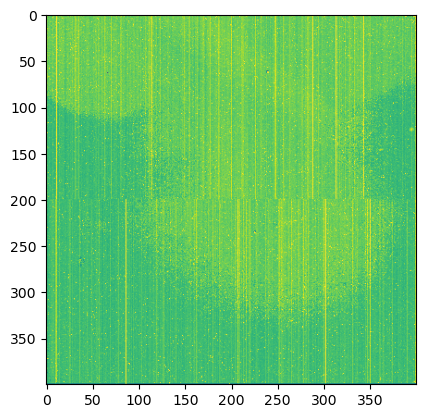

In [3]:
i = 0
fname = path / f'HV{HV[i]}V_pulse{pulse[i]}V_dark_master_0.json'

with RawFile(fname) as f:
    print(f.total_frames)
    headers, data = f.read()
# t0 = time.perf_counter()  
# data  = data.swapaxes(0,1).swapaxes(1,2).copy()
# t1 = time.perf_counter()
# print(f'{t1-t0:.3f}s')

print(data.shape)
t0 = time.perf_counter()    
# m = data.mean(axis = 2, keepdims=True)
std = data.std(axis = 0,)
t1 = time.perf_counter()
print(f'{t1-t0:.3f}s')
fig, ax = plt.subplots()
im = ax.imshow(std)
im.set_clim(0,30)


In [4]:
data  = data.swapaxes(0,1).swapaxes(1,2).copy()

In [5]:
#Processing using aare


for i in range(1):
    fname = path / f'HV{HV[i]}V_pulse{pulse[i]}V_dark_master_0.json'
    t0 = time.perf_counter()
    with RawFile(fname) as f:
        headers, data = f.read()
        dark_frame = data.mean(axis = 0)
        dark_noise = data.std(axis = 0, mean = dark_frame)
    
    fname = path / f'HV{HV[i]}V_pulse{pulse[i]}V_pulsed_master_0.json'
    with RawFile(fname) as f:
        headers, data = f.read()
        signal_frame = data.mean(axis = 0)
        signal_noise = data.std(axis = 0, mean = m)
        
    
    
    t1 = time.perf_counter()
print(f'reading {fname.name} took: {t1-t0:.3f}')

#Pure python read
# fname = fname.as_posix().replace('master_0.json', 'd0_f0_0.raw')
# data = np.fromfile(fname, dtype=np.uint16).astype(np.int32)
# data = darkFrames.reshape(-1, 400*400+56)
# data = darkFrames[:,56:].reshape(-1, 400, 400)

# mean = darkFrames.mean()
# std = darkFrames.std()

t1 = time.perf_counter()
print(f'reading took: {t1-t0:.3f}')

# HV1.7V_pulse0.201V_dark_master_0.json

NameError: name 'm' is not defined

In [ ]:
print(data[:,200,200].mean())
xmin = 9070
hist1 = bh.Histogram(bh.axis.Regular(100, -49.5+xmin, 50.5+xmin))
pixel = (400,400)
hist1.fill(data[:,200,200])
fig, ax = plt.subplots()
ax.step(hist1.axes[0].edges[:-1], hist1.values(), where="post", label = f'pixel {pixel}');
ax.set_xlabel('ADU pedestal corrected')
ax.set_ylabel('Counts [1]')
ax.grid()
ax.legend()
print(hist1.axes.edges)

In [ ]:
t0 = time.perf_counter()
mean = darkFrames.mean(axis = 0)
std = darkFrames.std(axis = 0, mean = mean)
t1 = time.perf_counter()
print(f'duration: {t1-t0:.3f}')

In [ ]:
base = Path('/mnt/sls_det_storage/highZ_data/moench03_039_Hecht_Mo17keV_22Jul2021/')
for f in base.glob('*'):
    print(f)
    
    
    

In [ ]:
fname = base/'moench03_m039_GaAs2021_LEC_g1_hg_Mo17keV_tint6us_e-190V_Tp15C_master_8.raw'
f = RawMasterFile(fname)
f.detector_type

In [ ]:
fname = base/'moench03_m039_GaAs2021_LEC_g1_hg_Mo17keV_tint6us_e-190V_Tp15C_d0_f000000000000_8.raw'
f = RawSubFile(fname, DetectorType.Moench03_old, 400, 400, 16)
img = f.read_frame()

fig, ax = plt.subplots()
im = ax.imshow(img)
im.set_clim(4600,5400)

In [ ]:
fig, ax = plt.subplots()
ax.plot(img[300,:])


In [ ]:
8+4+4+8+8+2+2+2+2+4+2+1+1+64